# Assignment 13 (KNN) Glass Dataset

## Q1. Prepare a model for glass classification using KNN

## Data Description:

## RI : refractive index

## Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

## Mg: Magnesium

## AI: Aluminum

## Si: Silicon

## K:Potassium

## Ca: Calcium

## Ba: Barium

## Fe: Iron

## Type: Type of glass: (class attribute)
## 1 -- building_windows_float_processed
## 2 --building_windows_non_float_processed
## 3 --vehicle_windows_float_processed
## 4 --vehicle_windows_non_float_processed (none in this database)
## 5 --containers
## 6 --tableware
## 7 --headlamps

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sns.set()

In [2]:
# Loading the dataset
df = pd.read_csv("glass.csv")

In [3]:
df1 = df.copy()

In [4]:
# Locating the types of glass based on their attributes
df1.loc[df['Type'] == 1, 'Type'] = 'building_windows_float_processed'
df1.loc[df['Type'] == 2, 'Type'] = 'building_windows_non_float_processed' 
df1.loc[df['Type'] == 3, 'Type'] = 'vehicle_windows_float_processed' 
df1.loc[df['Type'] == 4, 'Type'] = 'vehicle_windows_non_float_processed' 
df1.loc[df['Type'] == 5, 'Type'] = 'containers' 
df1.loc[df['Type'] == 6, 'Type'] = 'tableware' 
df1.loc[df['Type'] == 7, 'Type'] = 'headlamps'

In [5]:
# Displaying top 5 rows of dataset
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [6]:
# Summary Statistics of dataset
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


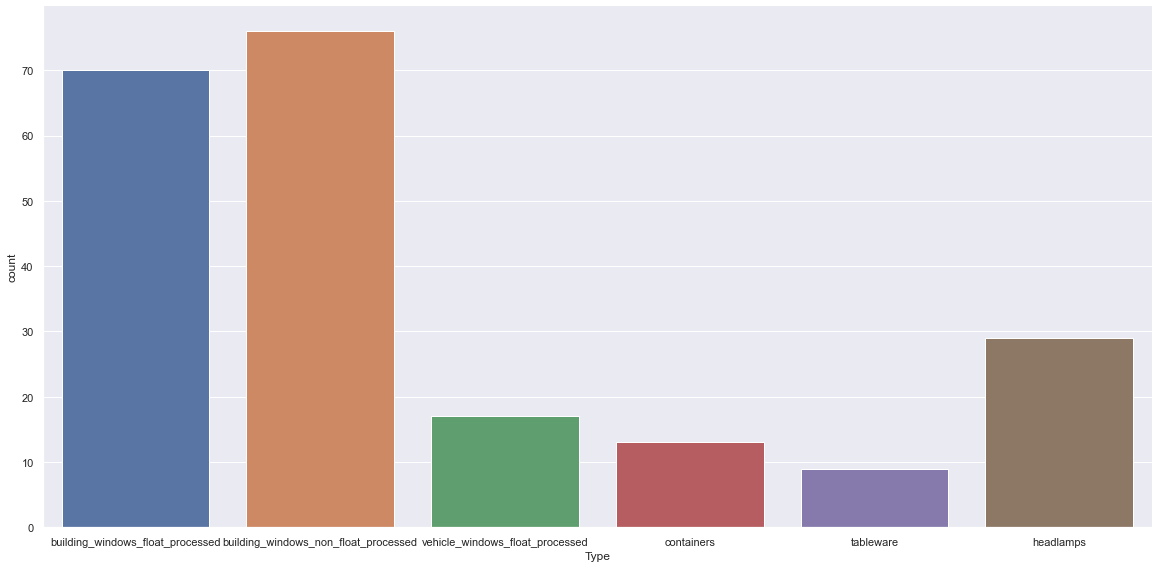

In [7]:
# Displaying factorplot for checking which type of glass has more frequency
sns.factorplot('Type', data=df1, kind="count",size = 8,aspect = 2)

## As shown in the graphs above, majority of the glass types are building_windows_float_processed and building_windows_non_float_processed, followed by headlamps 

## Correlation Analysis 

<AxesSubplot:>

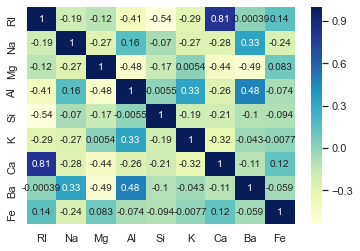

In [8]:
sns.heatmap(df1.corr(),cmap='YlGnBu',annot=True)

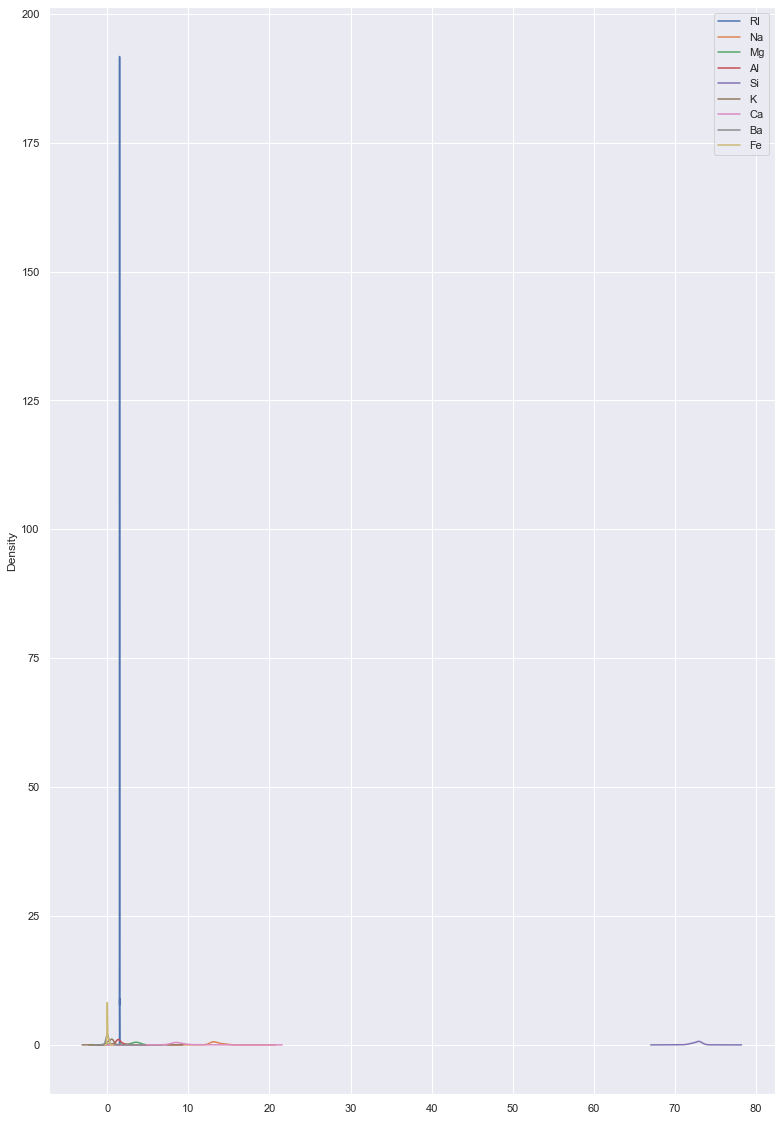

In [9]:
df1.plot(kind='density',layout=(4,5),figsize=(13,20))
plt.show()

## From above we can say RI has more values

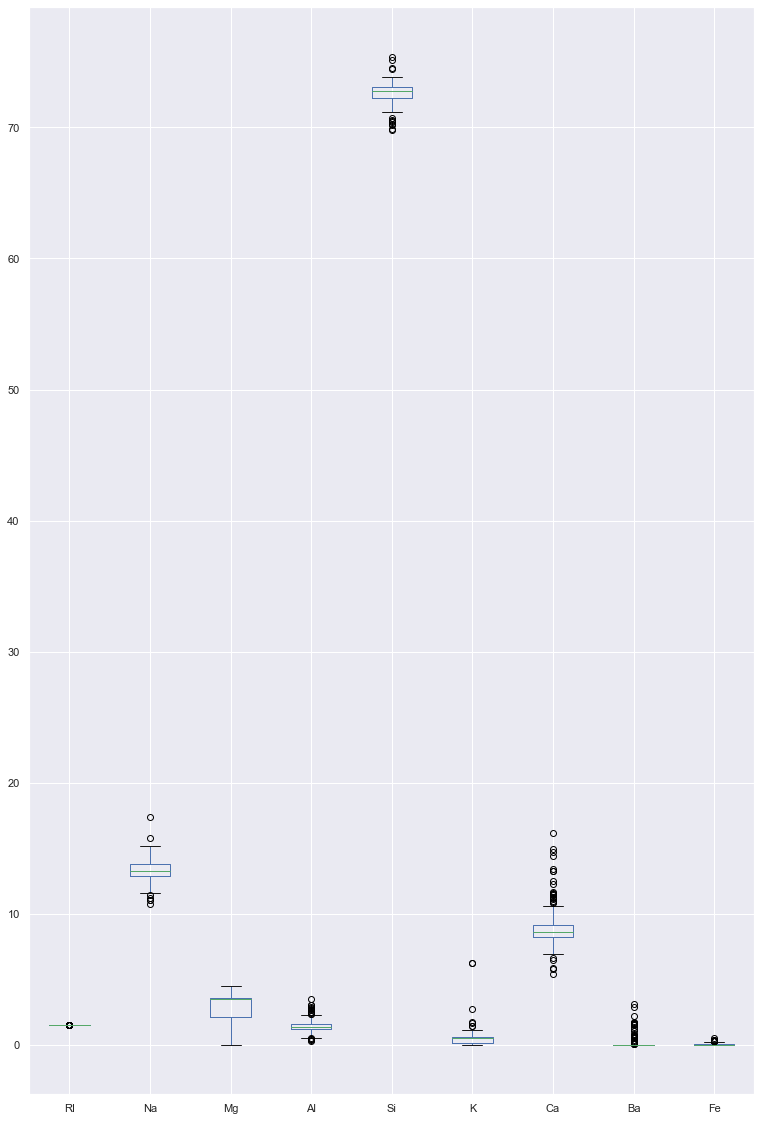

In [10]:
df1.plot(kind='box',layout=(4,5),figsize=(13,20))
plt.show()

## From above we can say Ca has more outliers  

## Correlation using pearson method

In [11]:
corr = df1.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386019,0.14301
Na,-0.191885,1,-0.273732,0.156794,-0.0698088,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1,-0.481799,-0.165927,0.00539567,-0.44375,-0.492262,0.0830595
Al,-0.407326,0.156794,-0.481799,1,-0.00552372,0.325958,-0.259592,0.479404,-0.0744022
Si,-0.542052,-0.0698088,-0.165927,-0.00552372,1,-0.193331,-0.208732,-0.102151,-0.0942007
K,-0.289833,-0.266087,0.00539567,0.325958,-0.193331,1,-0.317836,-0.0426181,-0.00771905
Ca,0.810403,-0.275442,-0.44375,-0.259592,-0.208732,-0.317836,1,-0.112841,0.124968
Ba,-0.000386019,0.326603,-0.492262,0.479404,-0.102151,-0.0426181,-0.112841,1,-0.0586918
Fe,0.14301,-0.241346,0.0830595,-0.0744022,-0.0942007,-0.00771905,0.124968,-0.0586918,1


## There exists high correlation between Ca and RI that is 0.81

## KNN 

## Finding optimal number of K

In [12]:
x = np.array(df1.iloc[:,3:5])
y = np.array(df1['Type'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [14]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [15]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

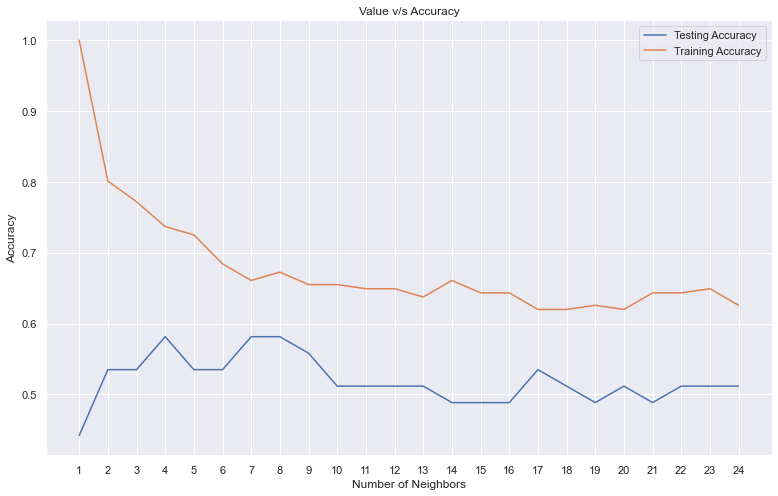

In [16]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value v/s Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

## We can see that k=4 produces the most accurate results 

## Applying the KNN Algorithm 

In [17]:
knn = KNeighborsClassifier(n_neighbors=4)

In [18]:
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

In [19]:
y_pred_KNeighborsClassifier

array(['building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed', 'containers',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_

In [20]:
scores = []
cv_scores = []

In [21]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [22]:
score_knn=cross_val_score(knn, x,y, cv=10)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [23]:
score_knn.mean()

0.601306857393814

In [24]:
score_knn.std()*2

0.21500492857894263

In [25]:
cv_score = score_knn.mean()

In [26]:
cv_scores.append(cv_score)

In [27]:
cv_scores

[0.601306857393814]

## Conclusion

## We can say that at value of k=4 the cross validation score is 0.6013 which gave the accuracy of 60%